# FormView

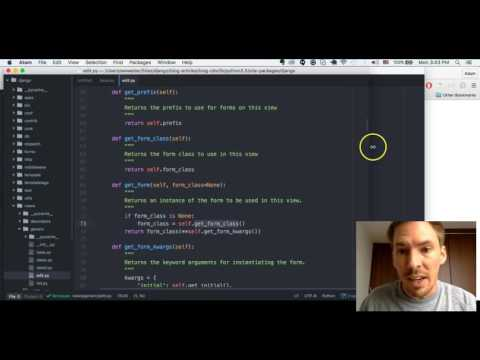

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('vzFVhGzaIQM')

### Example

[source](https://github.com/codedbyjay/django-whatyouspend/blob/ea047e5b32bdf1a76403cec5be7d3718e2d9902f/whatyouspend/views.py#L83)


```python
class TransactionFormView(TransactionsViewMixin, FormView):
    """ Allows customers to create expenses or income
    """

    form_class = TransactionForm
    template_name = "whatyouspend/transaction_form.html"
    context_object_name = "transaction"

    def get_queryset(self):
        return Transaction.expenses.all()

    def get_initial(self):
        initial = {
            "transaction_type": self.kwargs.get('transaction_type'),
            "date" : datetime.today(),
        }
        print("Returning initial: %s" % initial)
        return initial

    def get_context_data(self, **kwargs):
        ctx = super(TransactionFormView, self).get_context_data(**kwargs)
        ctx["edit"] = True if "pk" in self.kwargs else False
        if "pk" in self.kwargs:
            pk = self.kwargs.get("pk")
            ctx["transaction"] = Transaction.objects.get(pk=pk)
        return ctx

    def form_valid(self, form):
        transaction = form.save()
        cleaned_data = form.cleaned_data
        transaction_type = cleaned_data.get("transaction_type")
        return redirect(
            "whatyouspend:%s-detail" % transaction_type,
            pk=transaction.pk)
        
```